In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.preprocessing import normalize
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

In [2]:
df=pd.read_csv('bfi.csv')

In [3]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
import factor_analyzer as factor
import missingno as msngo

In [6]:
for i in df.columns:
    print()
    print(i)
    print(round(len(df[df[i].isnull()])/len(df),3))


A1
0.006

A2
0.01

A3
0.009

A4
0.007

A5
0.006

C1
0.007

C2
0.009

C3
0.007

C4
0.009

C5
0.006

E1
0.008

E2
0.006

E3
0.009

E4
0.003

E5
0.007

N1
0.008

N2
0.007

N3
0.004

N4
0.013

N5
0.01

O1
0.008

O2
0.0

O3
0.01

O4
0.005

O5
0.007

gender
0.0

education
0.08

age
0.0


<Figure size 288x288 with 0 Axes>

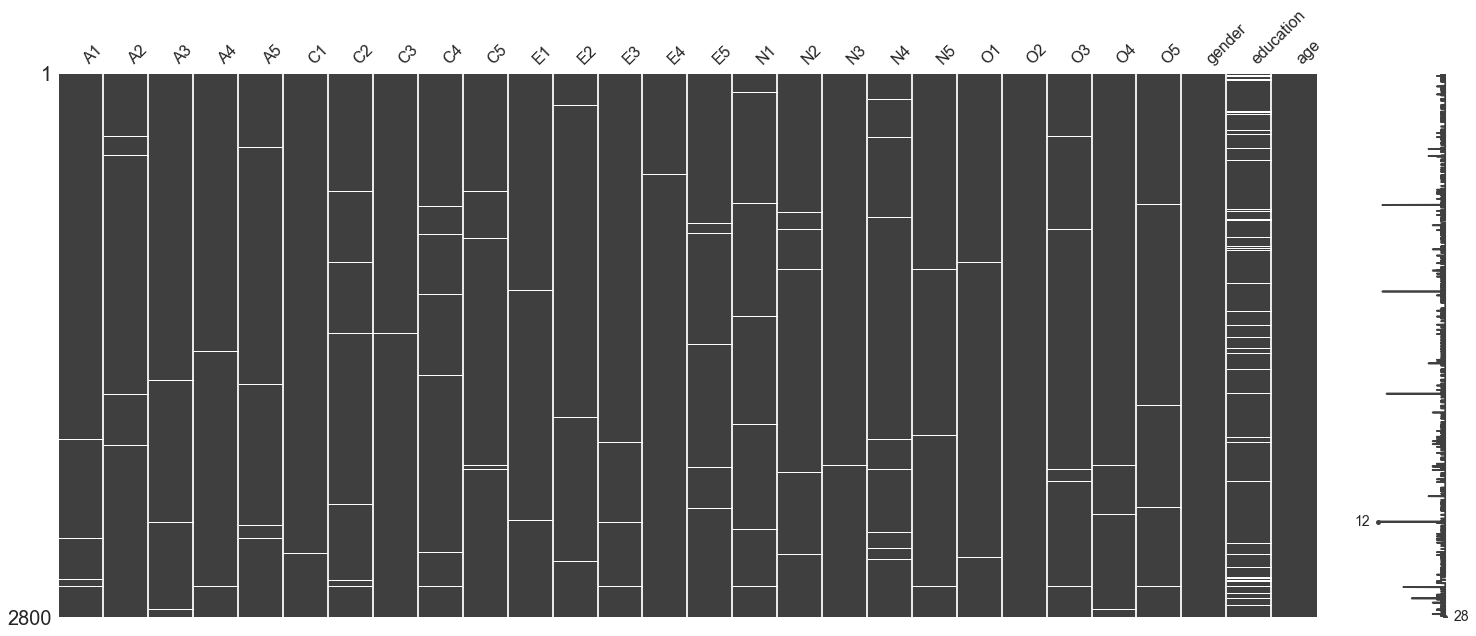

In [7]:
plt.figure(figsize=(4,4))
msngo.matrix(df)

Las variables con mayores perdidos son: N5,N4,A2

In [8]:
dfdropna=df.dropna()
dfdropna

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68
23,2.0,6.0,5.0,6.0,5.0,3.0,5.0,6.0,3.0,6.0,...,6.0,6.0,6.0,1,5.0,6.0,1.0,2,2.0,27
24,4.0,5.0,5.0,6.0,5.0,5.0,5.0,4.0,1.0,1.0,...,1.0,1.0,6.0,2,5.0,6.0,2.0,1,1.0,18
25,1.0,6.0,6.0,1.0,6.0,5.0,2.0,5.0,1.0,1.0,...,2.0,1.0,6.0,4,5.0,5.0,3.0,2,3.0,20
26,2.0,4.0,4.0,4.0,3.0,6.0,5.0,6.0,1.0,1.0,...,3.0,2.0,5.0,2,6.0,6.0,1.0,2,5.0,51
28,2.0,5.0,1.0,3.0,5.0,5.0,4.0,5.0,2.0,5.0,...,2.0,5.0,2.0,4,5.0,4.0,1.0,2,3.0,33


In [9]:
dataframe=dfdropna.loc[:,'A1':'O5']
dataframe

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0
23,2.0,6.0,5.0,6.0,5.0,3.0,5.0,6.0,3.0,6.0,...,4.0,4.0,4.0,6.0,6.0,6.0,1,5.0,6.0,1.0
24,4.0,5.0,5.0,6.0,5.0,5.0,5.0,4.0,1.0,1.0,...,2.0,3.0,3.0,1.0,1.0,6.0,2,5.0,6.0,2.0
25,1.0,6.0,6.0,1.0,6.0,5.0,2.0,5.0,1.0,1.0,...,2.0,3.0,1.0,2.0,1.0,6.0,4,5.0,5.0,3.0
26,2.0,4.0,4.0,4.0,3.0,6.0,5.0,6.0,1.0,1.0,...,3.0,3.0,5.0,3.0,2.0,5.0,2,6.0,6.0,1.0
28,2.0,5.0,1.0,3.0,5.0,5.0,4.0,5.0,2.0,5.0,...,1.0,4.0,2.0,2.0,5.0,2.0,4,5.0,4.0,1.0


In [10]:
group_mean=round(dataframe.mean(),2)

In [11]:
group_mean

A1    2.37
A2    4.83
A3    4.63
A4    4.75
A5    4.58
C1    4.57
C2    4.40
C3    4.32
C4    2.50
C5    3.26
E1    2.97
E2    3.12
E3    4.01
E4    4.43
E5    4.42
N1    2.91
N2    3.49
N3    3.20
N4    3.18
N5    2.95
O1    4.82
O2    2.69
O3    4.48
O4    4.95
O5    2.46
dtype: float64

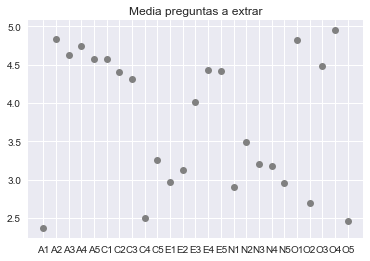

In [12]:
plt.title('Media preguntas a extrar')
plt.plot(group_mean,'o',color='grey')

In [13]:
corr=dataframe.corr()

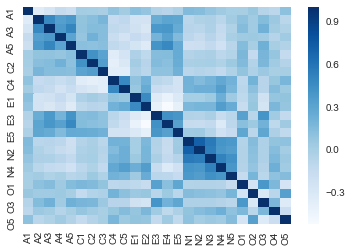

In [14]:
sns.heatmap(corr, cmap='Blues')

Se distingue correlación entre:
A3,A5 con A2,A3,A4,A5
C2 con C1,C2
E3,E5 con E3,E4,E5
N2,N4 con N1,N2,N3,N4,,N5

In [15]:
factor.calculate_bartlett_sphericity(dataframe)

(16484.781654160415, 0.0)

La prueba de esferacidad de errores sugiere que la matriz de correlaciones no es igual a la matriz de identidad, por lo que se puede seguir con el análisis.

In [16]:
factor.calculate_kmo(dataframe)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781354)

El análisis factorial, el KMO debe presentar valores superiores a .7, en este caso satisface el punto.

Text(0.5,1,'Screen plot')

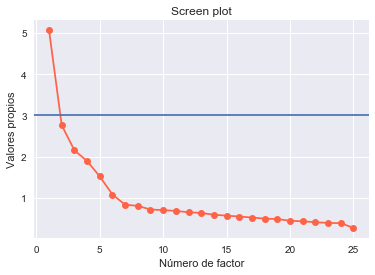

In [17]:
factorize=factor.FactorAnalyzer()
factorize.analyze(data=dataframe, n_factors=10)
factor_screenplot= factorize.get_eigenvalues()[0]
plt.plot(factor_screenplot.index+1,factor_screenplot.values,'o-',color='tomato')
plt.xlabel('Número de factor')
plt.ylabel('Valores propios')
plt.axhline(3)
plt.title('Screen plot')

Text(0.5,1,'Screen plot')

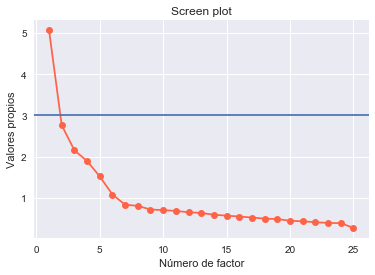

In [18]:
factorize1=factor.FactorAnalyzer()
factorize1.analyze(data=dataframe, n_factors=3)
factor_screenplot= factorize1.get_eigenvalues()[0]
plt.plot(factor_screenplot.index+1,factor_screenplot.values,'o-',color='tomato')
plt.xlabel('Número de factor')
plt.ylabel('Valores propios')
plt.axhline(3)
plt.title('Screen plot')

In [19]:
factor_loadings=factorize1.loadings

In [20]:
factor_loadings.applymap(lambda x: np.where(x < .4, '', round(x,2)))

,Factor1,Factor2,Factor3
A1,,,
A2,0.56,,
A3,0.67,,
A4,0.41,,
A5,0.65,,
C1,,,0.61
C2,,,0.6
C3,,,0.47
C4,,,
C5,,,


El factor 1 se relaciona con las características de amabilidad y extroversion, el factor 2 se relaciona con las características de neuroticismo y el factor 3 se relaciona con las caracteristicas de escrupolisidad.

In [21]:
extract_factor_scores=factorize1.get_scores(dataframe)

In [22]:

data['factor1']=extract_factor_scores.loc[:, 'Factor1']
data['factor2']=extract_factor_scores.loc[:, 'Factor2']
data['factor3']=extract_factor_scores.loc[:, 'Factor3']
data['age']=dfdropna['age']
data['gender']=dfdropna['gender']
data['education']=dfdropna['education']

In [34]:
data

,factor1,factor2,factor3,age,gender,education
0,0.964071,0.025031,1.386136,NaN,NaN,NaN
1,-2.344852,0.494380,-1.260989,NaN,NaN,NaN
2,0.060773,-0.190190,-0.346403,NaN,NaN,NaN
3,-0.877864,-0.413705,0.403767,NaN,NaN,NaN
4,0.415232,-0.926018,-1.031682,NaN,NaN,NaN
5,0.830041,1.078613,0.045171,21.0,2.0,3.0
6,0.717862,-0.673299,1.174907,NaN,NaN,NaN
7,1.378909,-1.043647,0.533762,19.0,1.0,2.0
8,-0.562184,0.301556,1.517864,NaN,NaN,NaN
9,-0.019987,-0.511173,-0.207998,NaN,NaN,NaN


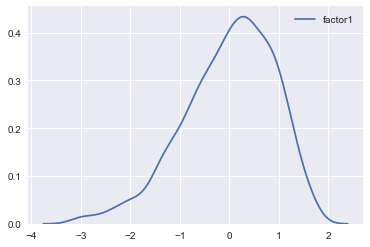

In [35]:
sns.kdeplot(data['factor1'])

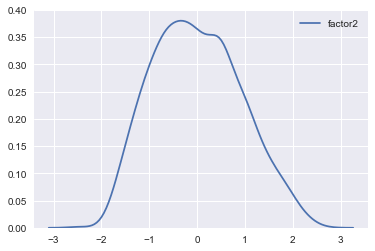

In [38]:
sns.kdeplot(data['factor2'])

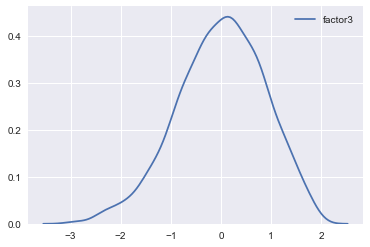

In [39]:
sns.kdeplot(data['factor3'])

In [41]:
modelo=smf.ols('factor1 ~ gender+education+age',data).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04312
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.988
Time:                        12:10:34   Log-Likelihood:                -2408.0
No. Observations:                1804   AIC:                             4824.
Df Residuals:                    1800   BIC:                             4846.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0113      0.111     -0.102      0.918      -0.229       0.206
gender         0.0045      0.047      0.097      0.923      -0.087       0.096
education   1.839e-05      0.020      0.001      0.999      -0.040       0.040
age            0.0007      0.002      0.331      0.741      -0.003       0.005
==============================================================================
Omnibus:                       91.101   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.315
Skew:                          -0.588   Prob(JB):                     2.23e-23
Kurtosis:                       3.080   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
modelo1=smf.ols('factor2 ~ gender+education+age',data).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3943
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.757
Time:                        12:10:40   Log-Likelihood:                -2418.3
No. Observations:                1804   AIC:                             4845.
Df Residuals:                    1800   BIC:                             4867.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.111      0.016      0.988      -0.217       0.220
gender         0.0030      0.047      0.064      0.949      -0.089       0.095
education     -0.0193      0.020     -0.950      0.342      -0.059       0.021
age            0.0015      0.002      0.733      0.464      -0.003       0.006
==============================================================================
Omnibus:                       73.839   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.360
Skew:                           0.240   Prob(JB):                     2.33e-10
Kurtosis:                       2.401   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
modelo2=smf.ols('factor3 ~ gender+education+age ',data).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                factor3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3637
Date:                Sun, 16 Dec 2018   Prob (F-statistic):              0.779
Time:                        12:10:45   Log-Likelihood:                -2312.9
No. Observations:                1804   AIC:                             4634.
Df Residuals:                    1800   BIC:                             4656.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0178      0.105      0.169      0.866      -0.188       0.224
gender         0.0287      0.044      0.650      0.516      -0.058       0.115
education     -0.0125      0.019     -0.651      0.515      -0.050       0.025
age           -0.0007      0.002     -0.341      0.733      -0.005       0.003
==============================================================================
Omnibus:                       31.959   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.379
Skew:                          -0.333   Prob(JB):                     5.65e-08
Kurtosis:                       2.997   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo estadístico de los tres factores elegidos deja claro que no hay correlación entre las características de la personalidad descriptas por los factores y el género, la edad y la educación de una persona.